Using different ML Python-based frameworks to classify PD vs. control using genetic and metabolomics data

First, using TensorFlow (more used in industry, for development) - Neural network
Note: Since TensorFlow 2.0, Keras has been fully integrated into TensorFlow as tf.keras. Keras has a simpler API.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Creating a mock dataset with 100 samples, 10 metabolite features, and 5 genetic features
np.random.seed(42)

# 10 Metabolite levels (continuous values)
metabolite_data = np.random.rand(100, 10)

# 5 Genetic features (binary or continuous, mock data)
genetic_data = np.random.rand(100, 5)

# Combine metabolites and genetics into one input feature set
X = np.hstack((metabolite_data, genetic_data))

# Create a binary target (PD vs. Controls) with random values (0: Control, 1: PD)
y = np.random.randint(2, size=100)

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build TensorFlow DNN model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # 128 is n of input layers
    Dense(64, activation='relu'),  # 64 is the number of output layers (input layer is inferred)
    Dense(1, activation='sigmoid')  # Output layer (binary classification) (input layer is inferred)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Plotting

1/1 [==============================] - 0s 100ms/step


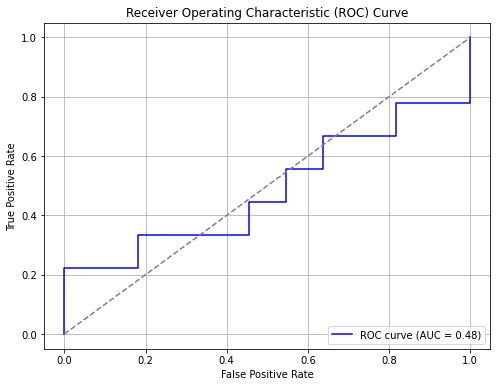

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities (for ROC curve, we need probability scores)
y_prob = model.predict(X_test).ravel()  # Flatten the probabilities to 1D array

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Then, using PyTorch (more used in research, more intuitive) - Neural network

In [33]:
###### RUN ONCE - REMOVING CACHE AND INSTALLING PYTORCH

# Run this in a Jupyter notebook cell
import os
import glob
import shutil

# Define the specific wheel filename
wheel_name = "torch-2.4.1-cp38-cp38-manylinux1_x86_64.whl"

# Common pip cache locations
cache_locations = [
    os.path.expanduser("~/.cache/pip"),
    os.path.expanduser("~/.pip/cache"),
    "/tmp/pip-cache"
]

# Find and remove the cached wheel file
found = False
for location in cache_locations:
    if not os.path.exists(location):
        continue
        
    print(f"Searching in {location}")
    
    # Search for the file in the cache directory and its subdirectories
    for root, dirs, files in os.walk(location):
        for file in files:
            if wheel_name in file:
                file_path = os.path.join(root, file)
                print(f"Found cached wheel at: {file_path}")
                
                # Remove the file
                os.remove(file_path)
                print(f"Removed cached wheel file: {file_path}")
                found = True

if not found:
    print("Could not find the cached wheel file.")

# After removing the cached file, try forcing a clean download
print("\nTrying to force a clean download:")
!pip --no-cache-dir install torch

Searching in /mnt/belinda_local/ruth/home/.cache/pip
Could not find the cached wheel file.

Trying to force a clean download:
     |███████████████████████▏        | 578.4 MB 80.3 MB/s eta 0:00:033  |██▉                             | 71.6 MB 1.8 MB/s eta 0:06:37     |██████████████████▍             | 458.3 MB 109.7 MB/s eta 0:00:04     |█████████████████████           | 520.6 MB 74.6 MB/s eta 0:00:04     |██████████████████████▊         | 565.1 MB 74.6 MB/s eta 0:00:04

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |██████████████████████████      | 645.5 MB 80.3 MB/s eta 0:00:02

     |██████████████████████████      | 650.0 MB 80.3 MB/s eta 0:00:02

     |██████████████████████████▎     | 654.6 MB 80.3 MB/s eta 0:00:02

     |██████████████████████████▌     | 658.8 MB 140.1 MB/s eta 0:00:01

     |██████████████████████████▋     | 663.1 MB 140.1 MB/s eta 0:00:01

     |██████████████████████████▉     | 667.4 MB 140.1 MB/s eta 0:00:01

     |███████████████████████████     | 671.8 MB 140.1 MB/s eta 0:00:01

     |███████████████████████████▏    | 675.9 MB 140.1 MB/s eta 0:00:01

     |███████████████████████████▎    | 680.8 MB 140.1 MB/s eta 0:00:01

     |███████████████████████████▌    | 684.9 MB 140.1 MB/s eta 0:00:01

     |███████████████████████████▊    | 689.1 MB 140.1 MB/s eta 0:00:01

     |███████████████████████████▉    | 693.6 MB 140.1 MB/s eta 0:00:01

     |████████████████████████████    | 697.5 MB 140.1 MB/s eta 0:00:01

     |████████████████████████████▏   | 701.7 MB 140.1 MB/s eta 0:00:01

     |████████████████████████████▍   | 706.3 MB 140.1 MB/s eta 0:00:01

     |████████████████████████████▌   | 710.3 MB 140.1 MB/s eta 0:00:01

     |████████████████████████████▊   | 714.2 MB 140.1 MB/s eta 0:00:01

     |████████████████████████████▉   | 719.1 MB 140.1 MB/s eta 0:00:01

     |█████████████████████████████   | 723.0 MB 140.1 MB/s eta 0:00:01

     |█████████████████████████████▏  | 726.8 MB 140.1 MB/s eta 0:00:01

     |█████████████████████████████▍  | 731.7 MB 140.1 MB/s eta 0:00:01

     |█████████████████████████████▌  | 735.7 MB 140.1 MB/s eta 0:00:01

     |█████████████████████████████▊  | 739.6 MB 140.1 MB/s eta 0:00:01

     |█████████████████████████████▉  | 744.1 MB 17.5 MB/s eta 0:00:04

     |██████████████████████████████  | 747.8 MB 17.5 MB/s eta 0:00:03

     |██████████████████████████████▏ | 751.5 MB 17.5 MB/s eta 0:00:03

     |██████████████████████████████▍ | 756.2 MB 17.5 MB/s eta 0:00:03

     |██████████████████████████████▌ | 759.5 MB 17.5 MB/s eta 0:00:03

     |██████████████████████████████▋ | 763.2 MB 17.5 MB/s eta 0:00:02

     |██████████████████████████████▉ | 768.0 MB 17.5 MB/s eta 0:00:02

     |███████████████████████████████ | 771.9 MB 17.5 MB/s eta 0:00:02

     |███████████████████████████████▏| 775.7 MB 17.5 MB/s eta 0:00:02

     |███████████████████████████████▎| 780.4 MB 17.5 MB/s eta 0:00:01

     |███████████████████████████████▌| 784.3 MB 17.5 MB/s eta 0:00:01

     |███████████████████████████████▋| 788.1 MB 17.5 MB/s eta 0:00:01

     |███████████████████████████████▉| 792.6 MB 17.5 MB/s eta 0:00:01

     |████████████████████████████████| 796.5 MB 17.5 MB/s eta 0:00:01

     |████████████████████████████████| 797.1 MB 17.5 MB/s eta 0:00:01
     |████████████████████████████████| 124.2 MB 98.4 MB/s eta 0:00:01     |█████████                       | 34.7 MB 116.8 MB/s eta 0:00:01��█▌                  | 52.5 MB 116.8 MB/s eta 0:00:01     |████████████████████████▎       | 94.4 MB 98.4 MB/s eta 0:00:01     |██████████████████████████████▏ | 117.2 MB 98.4 MB/s eta 0:00:01
     |███████████████████████████████▋| 406.1 MB 117.6 MB/s eta 0:00:01    |█████▎                          | 67.9 MB 118.9 MB/s eta 0:00:03     |██████████▎                     | 131.8 MB 74.9 MB/s eta 0:00:04     |██████████████▍                 | 185.1 MB 435 kB/s eta 0:08:39     |███████████████████▍            | 249.0 MB 435 kB/s eta 0:06:12     |█████████████████████████████▌  | 379.1 MB 117.6 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 56.5 MB 95.5 MB/s eta 0:00:01
     |████████████████████████████████| 176.2 MB 91.7 MB/s eta 0:00:011    |█████████                       | 49.3 MB 111.5 MB/s eta 0:00:02██████▋ | 168.8 MB 114.5 MB/s eta 0:00:01
     |████████████████████████████████| 193 kB 91.5 MB/s eta 0:00:01
     |████████████████████████████████| 14.1 MB 95.8 MB/s eta 0:00:01
     |████████████████████████████████| 121.6 MB 11.4 MB/s eta 0:00:01     |██████████▍                     | 39.3 MB 108.8 MB/s eta 0:00:01
     |████████████████████████████████| 196.0 MB 8.2 MB/s eta 0:00:013:00:02     |█████████████▊                  | 84.2 MB 12.8 MB/s eta 0:00:09     |██████████████████████▍         | 137.1 MB 12.8 MB/s eta 0:00:05
     |████████████████████████████████| 99 kB 97.7 MB/s  eta 0:00:01
     |████████████████████████████████| 209.4 MB 152.6 MB/s eta 0:00:01:02                   | 5.5 MB 110.3 MB/s eta 0:00:02MB 110.3 MB/s eta 0:00:02     |████████▊                   

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Mock dataset (features: metabolites + genetic info, target: PD vs controls)
X = X
y = y

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model
class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Model initialization
model = NeuralNet(X_train.shape[1])

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train).squeeze()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Test Accuracy: 60.00%


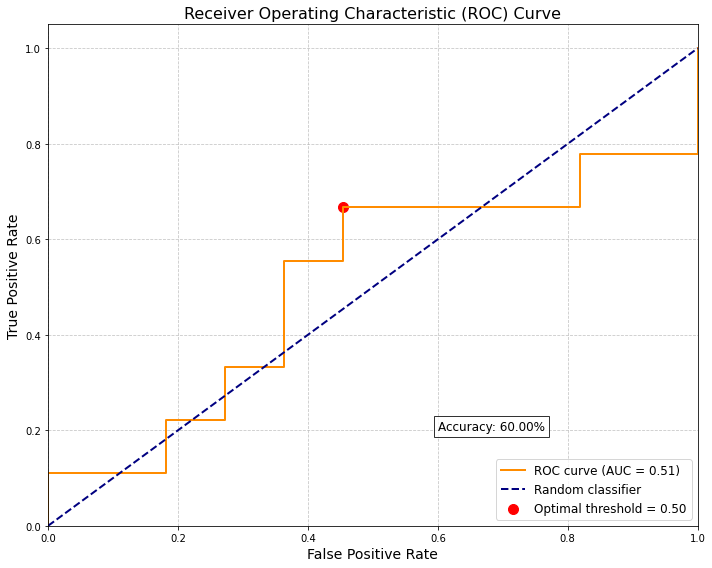

AUC: 0.5051
Optimal threshold: 0.4954


In [35]:
# Evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_test).squeeze()
    predicted_classes = (predictions > 0.5).float()
    accuracy = (predicted_classes == y_test).float().mean()
    print(f'Test Accuracy: {accuracy * 100:.2f}%')
    
    # Convert to numpy for ROC curve calculation
    y_pred_prob = predictions.numpy()
    y_true = y_test.numpy()
    
    # Calculate ROC curve points
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add confidence intervals or additional information
    plt.text(0.6, 0.2, f'Accuracy: {accuracy * 100:.2f}%', fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.8))
    
    # Highlight the optimal threshold point
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], c='red', s=100, 
                label=f'Optimal threshold = {optimal_threshold:.2f}')
    plt.legend(loc="lower right", fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Print additional metrics
    print(f'AUC: {roc_auc:.4f}')
    print(f'Optimal threshold: {optimal_threshold:.4f}')

Finally, with scikit-learn - NOT a neural network, but uses random forest

Test Accuracy: 55.00%


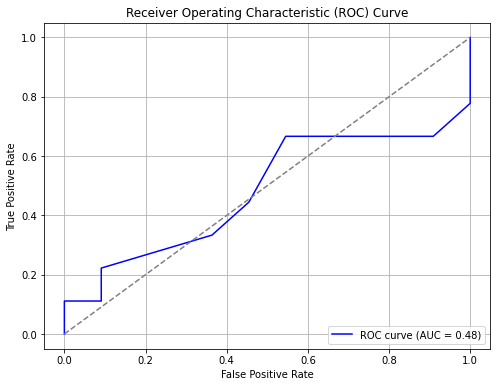

In [13]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Mock dataset (features: metabolites + genetic info, target: PD vs controls)
# Assume X and y are already defined as input data and target variable

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Get predicted probabilities (for ROC curve, we need probability scores)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (PD)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()